https://www.datacamp.com/community/tutorials/preprocessing-in-data-science-part-2-centering-scaling-and-logistic-regression

In [1]:
import sklearn


In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [4]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print( digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print(digits.target.shape)

(1797, 64)
(1797,)


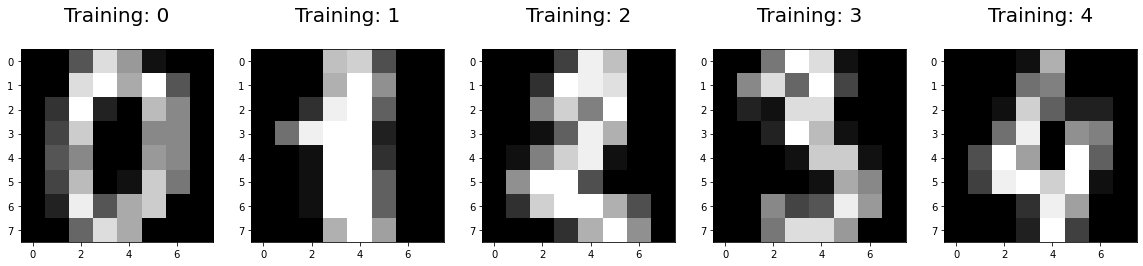

In [28]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [32]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l2', #ridge regression
                        solver='saga',
                        max_iter=10000,
                        C=50)
clf

LogisticRegression(C=50, max_iter=10000, solver='saga')

In [34]:
clf.fit(x_train, y_train)

LogisticRegression(C=50, max_iter=10000, solver='saga')

In [35]:
clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [36]:
clf.coef_.shape

(10, 64)

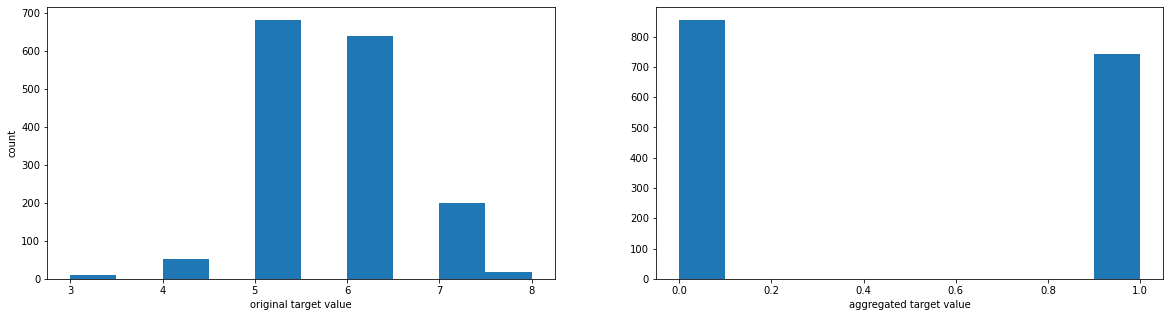

In [22]:
# Import necessary modules
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import pandas as  pd

# Load data
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv ' , sep = ';')
X = df.drop('quality' , 1).values #drop target variable
y1 = df['quality'].values
y = y1 <= 5 # is the rating <= 5?

# plot histograms of original target variable
# and aggregated target variable
plt.figure(figsize=(20,5));
plt.subplot(1, 2, 1 );
plt.hist(y1);
plt.xlabel('original target value')
plt.ylabel('count')
plt.subplot(1, 2, 2);
plt.hist(y.astype(int))
plt.xlabel('aggregated target value')
plt.show();


In [24]:
# Split the data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y.astype(int), test_size=0.2, random_state=42)

#initial logistic regression model
lr = linear_model.LogisticRegression()

# fit the model
lr = lr.fit(X_train, y_train)

print('Logistic Regression score for training set: %f' % lr.score(X_train, y_train))
from sklearn.metrics import classification_report
y_true, y_pred = y_test, lr.predict(X_test)
print(classification_report(y_true, y_pred))


Logistic Regression score for training set: 0.747459
              precision    recall  f1-score   support

           0       0.78      0.75      0.77       179
           1       0.70      0.74      0.72       141

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.75      0.74      0.74       320



/home/macbuse/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression score for training set: 0.752932
             precision    recall  f1-score   support

      False       0.78      0.74      0.76       179
       True       0.69      0.74      0.71       141

avg / total       0.74      0.74      0.74       320

In [25]:
from sklearn.preprocessing import scale
Xs = scale(X)
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=42)
lr_2 = lr.fit(Xs_train, y_train)
print('Scaled Logistic Regression score for test set: %f' % lr_2.score(Xs_test, y_test))
y_true, y_pred = y_test, lr_2.predict(Xs_test)
print(classification_report(y_true, y_pred))

Scaled Logistic Regression score for test set: 0.740625
              precision    recall  f1-score   support

       False       0.79      0.74      0.76       179
        True       0.69      0.74      0.72       141

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320

